In [1]:
import resume_rating_main as rrm
 



In [7]:
import gdown
from google_drive_downloader import GoogleDriveDownloader as gdd
import aspose.words as aw

import os
global i
i=0
req_document=rrm.cnst.UPLOAD_FOLDER+"\\"+"sde.docx"
def resume_select(row,samplepercent,model):
    
    global i
    global x,E_accept_test,result_personalityconf_test,result_jobfit_test,classifier_decision_test,max_personalityconf,max_personality
    print(i)
    abs_paths=" "
    # name=row[3]
    # print(name)
    age=row[3]
    gender= 1 if row[2]=='Male' else 0
    openness=row[4]
    neuroticism=row[5]
    conscientiousness=row[6]
    agreeableness=row[7]
    extraversion=row[8]
    
    url=row[9]
    file_id=url.partition("?id=")[2]
    
    # print(file_id)
    gdd.download_file_from_google_drive(file_id=file_id,dest_path=rrm.cnst.UPLOAD_FOLDER+"\\"+str(i)+".pdf")
    if(os.path.isfile(rrm.cnst.UPLOAD_FOLDER+"\\"+str(i)+".pdf")):
        try:

            doc=aw.Document(rrm.cnst.UPLOAD_FOLDER+"\\"+str(i)+".pdf")
            output=rrm.cnst.UPLOAD_FOLDER+'\\'+str(i)+".docx"

            doc.save(output)
            
            # gdown.download(url, output, quiet=False, fuzzy=True)

            result_jobfit = rrm.resume_matcher.process_files(req_document,[output])
            # print(result_jobfit)
            result_trait,result_personalityconf= rrm.main.prediction_result(req_document,[output],(gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion),samplepercent,model)
            if(result_personalityconf>max_personalityconf):
                max_personalityconf=result_personalityconf
                max_personality=[openness,neuroticism,conscientiousness,agreeableness,extraversion]
            E_accept, E_solve = rrm.human_model(result_jobfit[0][1], result_personalityconf)
            x.append(i)
            E_accept_test.append(E_accept)
            result_personalityconf_test.append(result_personalityconf)
            # print(result_jobfit,"Fff")
            result_jobfit_test.append(result_jobfit[0][1])
            w1=0.75
            w2=0.25
            classifier_decision = result_jobfit[0][1]*w1 + result_personalityconf*w2
            classifier_decision_test.append(classifier_decision)

        except:
            print("error ",i)
        i=i+1
            
        



training dataset size= 1136
0
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\0.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.06660975761022782


---- 0.0322795614506028 0.45232753830029515 -0.03433019615962501 -0.481062704089477 
 1 -1 



----------
1
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\1.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.10670613353627231


---- 0.0 -0.0 0.10670613353627231 -0.8932938664637277 
 -1 1 



----------
2
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\2.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.16603777857722757


---- 0.010443866990941273 -0.05245667938130266 0.1555939115862863 -0.7815055420414697 
 -1 1 



----------
3
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\3.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.10150773554268738


---- 0.006384892026644281 -0.056515654345599645 0.0951228435160431 -0.8419766101117129 
 -1 1 



----------
4
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\4.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1571523776418293


---- 0.06658611752391151 0.3571180511503286 -0.09056626011791778 -0.4857295712078421 
 1 -1 



----------
5
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\5.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3391906731328546


---- 0.12227195701409721 -0.23820952640866652 0.2169187161187574 -0.4225998004584788 
 -1 1 



----------
6
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\6.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.07416013408143608


---- 0.03691620990540044 0.4608742857922251 -0.03724392417603564 -0.4649655801263388 
 1 -1 



----------
7
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\7.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.07525240985676505


---- 0.03263132899027437 0.40099370776781257 -0.04262108086649068 -0.5237538823754223 
 1 -1 



----------
8
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\8.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1011835307000836


---- 0.010500888206162441 -0.09327971851419355 0.09068264249392116 -0.805536750785723 
 -1 1 



----------
9
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\9.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.14988127010317143


---- 0.07670122937984447 0.43504536395397797 -0.07318004072332696 -0.4150733659428506 
 1 -1 



----------
10
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\10.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.23105518981849263


---- 0.10437171139230413 0.3473459560372577 -0.12668347842618852 -0.42159885414424975 
 1 -1 



----------
11
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\11.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.06311913420870599


---- 0.026854124632694588 0.39859728513950426 -0.036265009576011406 -0.5382835806517897 
 1 -1 



----------
12
error  12
13
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\13.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.11010624523370406


---- 0.012070479257057246 -0.09755526659811439 0.09803576597664682 -0.7923384881681816 
 -1 1 



----------
14
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\14.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2163379527849953


---- 0.023716209430836015 -0.08590953642433562 0.1926217433541593 -0.697752510790669 
 -1 1 



----------
15
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\15.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.08237920273787969


---- 0.009030881543094458 -0.10059486431207718 0.07334832119478524 -0.8170259329500432 
 -1 1 



----------
16
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\16.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.07027302032397127


---- 0.007703732266510986 -0.10192201358866065 0.06256928805746029 -0.8278049660873681 
 -1 1 



----------
17
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\17.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1464971325156692


---- 0.016059857417674153 -0.09356588843749748 0.13043727509799505 -0.7599369790468333 
 -1 1 



----------
18
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\18.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.0730082887150904


---- 0.008003588104001496 -0.10162215775117014 0.0650047006110889 -0.8253695535337395 
 -1 1 



----------
19
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\19.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.08071524454206817


---- 0.008848468884806795 -0.10077727697036484 0.07186677565726138 -0.8185074784875671 
 -1 1 



----------
20
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\20.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.11802653679509159


---- 0.012938747126864774 -0.09668699872830687 0.10508778966822682 -0.7852864644766016 
 -1 1 



----------
21
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\21.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.17549240371970617


---- 0.019238485649689687 -0.09038726020548195 0.15625391807001648 -0.7341203360748119 
 -1 1 



----------
22
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\22.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3282807787363869


---- 0.03598802521889298 -0.07363772063627866 0.2922927535174939 -0.5980815006273346 
 -1 1 



----------
23
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\23.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.07369111747249386


---- 0.00807844371582321 -0.10154730213934843 0.06561267375667065 -0.8247615803881577 
 -1 1 



----------
24
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\24.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.09892402545516807


---- 0.010844620073518784 -0.09878112578165285 0.0880794053816493 -0.8022948487631791 
 -1 1 



----------
25
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\25.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.16035205027583133


---- 0.01757871311089399 -0.09204703274427765 0.14277333716493734 -0.7476009169798911 
 -1 1 



----------
26
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\26.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.09822946511749293


---- 0.010768478378459729 -0.0988572674767119 0.08746098673903321 -0.8029132674057952 
 -1 1 



----------
27
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\27.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.11770648713844066


---- 0.012903661444543725 -0.0967220844106279 0.10480282569389694 -0.7855714284509314 
 -1 1 



----------
28
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\28.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.07639547210253411


---- 0.008374910609198259 -0.10125083524597338 0.06802056149333585 -0.8223536926514925 
 -1 1 



----------
29
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\29.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.08499028760776484


---- 0.00931712366944677 -0.10030862218572487 0.07567316393831806 -0.8147010902065104 
 -1 1 



----------
30
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\30.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.0643403926006112


---- 0.02504784765300105 0.3642542165803327 -0.03929254494761014 -0.5714053908190561 
 1 -1 



----------
31
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\31.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.03959122428542638


---- 0.004340217491609251 -0.10528552836356239 0.03525100679381713 -0.8551232473510113 
 -1 1 



----------
32
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\32.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.18956893393288896


---- 0.020781635773362707 -0.08884411008180892 0.16878729815952626 -0.7215869559853021 
 -1 1 



----------
33
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\33.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.09401616613261872


---- 0.010306592334732054 -0.09931915352043957 0.08370957379788667 -0.8066646803469417 
 -1 1 



----------
34
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\34.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.19156315817411604


---- 0.02100025409320969 -0.08862549176196194 0.17056290408090635 -0.719811350063922 
 -1 1 



----------
35
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\35.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1877354098942125


---- 0.020580634333079415 -0.08904511152209221 0.1671547755611331 -0.7232194785836953 
 -1 1 



----------
36
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\36.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2834583562847228


---- 0.03107433372659372 -0.07855141212857791 0.25238402255812914 -0.6379902315866993 
 -1 1 



----------
37
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\37.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.26815446367945106


---- 0.029396633085253355 -0.08022911276991829 0.23875783059419772 -0.6516164235506307 
 -1 1 



----------
38
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\38.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.20792021983232153


---- 0.0227934091774895 -0.08683233667768214 0.18512681065483205 -0.7052474434899964 
 -1 1 



----------
39
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\39.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3267800405479813


---- 0.03582350567565568 -0.07380224017951596 0.29095653487232565 -0.5994177192725028 
 -1 1 



----------
40
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\40.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2061991148086693


---- 0.02260473175557654 -0.0870210140995951 0.18359438305309275 -0.7067798710917357 
 -1 1 



----------
41
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\41.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.18331523427953508


---- 0.02009606928450956 -0.08952967657066208 0.16321916499502553 -0.7271550891498029 
 -1 1 



----------
42
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\42.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.08582976835856859


---- 0.04159371511653731 0.44301338463436063 -0.044236053242031274 -0.4711568470070707 
 1 -1 



----------
43
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\43.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.08927322670403937


---- 0.0 -0.0 0.08927322670403937 -0.9107267732959606 
 -1 1 



----------
44
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\44.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2628395900889579


---- 0.016532753824852083 -0.046367792547391845 0.24630683626410582 -0.6907926173636502 
 -1 1 



----------
45
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\45.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.24294571785525473


---- 0.1029371134168272 0.3207670552574129 -0.14000860443842753 -0.43628722688733235 
 1 -1 



----------
46
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\46.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.34182590957682074


---- 0.12322191095658785 -0.23725957246617588 0.2186039986202329 -0.4209145179570033 
 -1 1 



----------
47
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\47.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.24665058710770557


---- 0.12278031802045514 0.37501017767717043 -0.12387026908725043 -0.37833923521512397 
 1 -1 



----------
48
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\48.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.06842789736894873


---- 0.029672049511888995 0.40395298724619794 -0.03875584785705974 -0.5276191153848533 
 1 -1 



----------
49
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\49.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1605777395983662


---- 0.016664855241301773 -0.0871157514790542 0.14391288435706442 -0.7523065089225797 
 -1 1 



----------
50
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\50.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.19447943016027047


---- 0.09952418585802146 0.41222240747580097 -0.09495524430224901 -0.39329816236392856 
 1 -1 



----------
51
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\51.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.14248907946219805


---- 0.06436483460884959 0.38735283282071226 -0.07812424485334847 -0.4701580877170898 
 1 -1 



----------
52
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\52.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21095410021250038


---- 0.08975071933263401 0.33570069043956485 -0.12120338087986637 -0.45334520934793476 
 1 -1 



----------
53
error  53
54
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\54.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.16897893079975448


---- 0.07387422259329367 0.3633058580454992 -0.09510470820646082 -0.46771521115474635 
 1 -1 



----------
55
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\55.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.17598509487591152


---- 0.048856408876528055 -0.2287603342401381 0.12712868599938346 -0.5952545708839504 
 -1 1 



----------
56
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\56.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21877384094040256


---- 0.07415631072265895 -0.2648070242167331 0.14461753021774362 -0.5164191348428644 
 -1 1 



----------
[0.3801077642157304, 0.026676533384068078, 0.08868485442348983, 0.0725523436648548, 0.3570662209161374, 0.3551587808502865, 0.3918829052935782, 0.3440318800327565, 0.10313133771528787, 0.4212802625261597, 0.39655204802679456, 0.33486834088132567, 0.10974587069980474, 0.13630379758762756, 0.10281411007584865, 0.09978756447237154, 0.11884359252029603, 0.10047138157015133, 0.10239812052689577, 0.11172594359015162, 0.12609241032130528, 0.16428950407547543, 0.10064208875950219, 0.10695031575517075, 0.12230732196033656, 0.10677667567075196, 0.1116459311759889, 0.10131817741701225, 0.10346688129331993, 0.3080616463251531, 0.09211711546273532, 0.12961154287460097, 0.1057233509245334, 0.13011009893490774, 0.12915316186493186, 0.15308389846255943, 0.1492579253112415, 0.13419936434945912, 0.16391431952837404, 0.13376908809354604, 0.1280481179612625, 0.3849127669028156, 

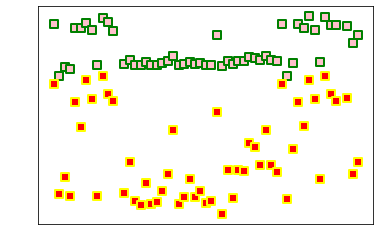

training dataset size= 2272
0
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\0.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.32558923676976875


---- 0.15778285574110607 0.3268242440097919 -0.1678063810286627 -0.3475865192204393 
 1 -1 



----------
1
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\1.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.303295166633785


---- 0.0 -0.0 0.303295166633785 -0.696704833366215 
 -1 1 



----------
2
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\2.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.12811755764212573


---- 0.008058664375567164 -0.054841881996676764 0.12005889326655857 -0.8170405603611974 
 -1 1 



----------
3
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\3.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.40036470215701453


---- 0.02518315851383692 -0.03771738785840701 0.3751815436431776 -0.5619179099845785 
 -1 1 



----------
4
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\4.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.28571116200969254


---- 0.12105701038026791 -0.30264715829397215 0.16465415162942462 -0.41164167969633525 
 -1 1 



----------
5
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\5.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1318646839874093


---- 0.04753477689485527 -0.31294670652790846 0.08432990709255403 -0.5551886094846822 
 -1 1 



----------
6
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\6.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.41863275766978486


---- 0.20839140795570615 0.2893990877419194 -0.2102413497140787 -0.2919681545882958 
 1 -1 



----------
7
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\7.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3630466979292735


---- 0.15742613773448333 -0.2761988990236037 0.2056205601947902 -0.36075440304712286 
 -1 1 



----------
8
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\8.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.40738609833245243


---- 0.042278776454380516 -0.061501830265975464 0.36510732187807193 -0.5311120714015721 
 -1 1 



----------
9
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\9.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2546719969873599


---- 0.13032752687580293 0.38141906645801954 -0.124344470111557 -0.3639089365546206 
 1 -1 



----------
10
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\10.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.12439366322413063


---- 0.056190815394622756 0.3955268520349391 -0.06820284782950789 -0.4800794847409304 
 1 -1 



----------
11
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\11.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3822449512484442


---- 0.162626653386956 -0.26282475638524283 0.2196182978614882 -0.3549302923663129 
 -1 1 



----------
12
error  12
13
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\13.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.40142498650177116


---- 0.044006513550158874 -0.06561923230501276 0.35741847295161233 -0.5329557811932161 
 -1 1 



----------
14
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\14.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.33381348428418883


---- 0.03659455219116782 -0.07303119366400382 0.297218932093021 -0.5931553220518073 
 -1 1 



----------
15
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\15.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.4495148065878978


---- 0.049278395945141516 -0.06034734991003012 0.4002364106427563 -0.4901378435020721 
 -1 1 



----------
16
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\16.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.40057435048735585


---- 0.04391326194262732 -0.06571248391254432 0.35666108854472856 -0.5337131656001 
 -1 1 



----------
17
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\17.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.20461990423380966


---- 0.022431609618445175 -0.08719413623672645 0.18218829461536448 -0.7081859595294638 
 -1 1 



----------
18
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\18.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.47155425806171014


---- 0.05169448725119706 -0.05793125860397458 0.4198597708105131 -0.4705144833343153 
 -1 1 



----------
19
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\19.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.38533956742625214


---- 0.04224313748661209 -0.06738260836855955 0.34309642993964007 -0.5472778242051884 
 -1 1 



----------
20
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\20.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.24766942083957466


---- 0.02715094498505676 -0.08247480087011487 0.22051847585451792 -0.6698557782903105 
 -1 1 



----------
21
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\21.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2762758388255722


---- 0.030286944893016542 -0.0793388009621551 0.24598889393255569 -0.6443853602122728 
 -1 1 



----------
22
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\22.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1426975450432677


---- 0.01564332480707017 -0.09398242104810146 0.12705422023619753 -0.7633200339086309 
 -1 1 



----------
23
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\23.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3657173072667374


---- 0.040092032581261074 -0.06953371327391056 0.32562527468547636 -0.564748979459352 
 -1 1 



----------
24
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\24.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3311154960951596


---- 0.03629878322363705 -0.07332696263153458 0.29481671287152256 -0.5955575412733057 
 -1 1 



----------
25
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\25.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2818731565858824


---- 0.030900555027278946 -0.0787251908278927 0.25097260155860346 -0.6394016525862249 
 -1 1 



----------
26
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\26.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3558788166148592


---- 0.03901348070545979 -0.07061226514971185 0.3168653359093994 -0.5735089182354289 
 -1 1 



----------
27
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\27.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3745114206437421


---- 0.04105609381935015 -0.06856965203582148 0.33345532682439194 -0.5569189273204365 
 -1 1 



----------
28
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\28.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1517267269330303


---- 0.016633155606197405 -0.09299259024897424 0.1350935713268329 -0.7552806828179955 
 -1 1 



----------
29
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\29.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.37595090088969174


---- 0.041213897914956166 -0.06841184794021547 0.3347370029747356 -0.5556372511700928 
 -1 1 



----------
30
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\30.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.40739751064646246


---- 0.1586006918581894 -0.23070137237514435 0.24879681878827303 -0.36190111697839317 
 -1 1 



----------
31
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\31.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.5457511558122451


---- 0.05982837750723936 -0.04979736834793228 0.48592277830500574 -0.40445147583982266 
 -1 1 



----------
32
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\32.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.312182983269629


---- 0.03422329238422565 -0.07540245347094598 0.2779596908854034 -0.612414563259425 
 -1 1 



----------
33
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\33.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.4487758974574241


---- 0.04919739248059414 -0.0604283533745775 0.39957850497682995 -0.49079574916799845 
 -1 1 



----------
34
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\34.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.36575622415856274


---- 0.040096298874553786 -0.06952944698061785 0.32565992528400894 -0.5647143288608194 
 -1 1 



----------
35
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\35.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.20443092074097602


---- 0.022410892162088972 -0.08721485369308267 0.18202002857888705 -0.7083542255659413 
 -1 1 



----------
36
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\36.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.23688724720723126


---- 0.02596894115867115 -0.0836568046965005 0.2109183060485601 -0.6794559480962683 
 -1 1 



----------
37
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\37.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.20582099596788256


---- 0.0225632801956334 -0.08706246565953825 0.18325771577224917 -0.7071165383725793 
 -1 1 



----------
38
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\38.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21962984000262548


---- 0.02407708502233983 -0.0855486608328318 0.19555275498028565 -0.6948214991645427 
 -1 1 



----------
39
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\39.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.15269499870075232


---- 0.016739303120924438 -0.0928864427342472 0.1359556955798279 -0.7544185585650005 
 -1 1 



----------
40
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\40.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21502123317241964


---- 0.023571863061225277 -0.08605388279394637 0.19144937011119437 -0.6989248840336341 
 -1 1 



----------
41
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\41.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.15522430704565746


---- 0.01701658043473237 -0.09260916542043926 0.1382077266109251 -0.7521665275339033 
 -1 1 



----------
42
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\42.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1965795332101766


---- 0.095263837459369 0.38934326229152894 -0.10131569575080758 -0.4140772044982944 
 1 -1 



----------
43
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\43.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21247429258231085


---- 0.0 -0.0 0.21247429258231085 -0.7875257074176891 
 -1 1 



----------
44
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\44.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.23944781488856842


---- 0.015061398384130878 -0.047839147988113055 0.22438641650443752 -0.7127130371233186 
 -1 1 



----------
45
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\45.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3840486936261681


---- 0.1627230324633035 -0.2609811362109366 0.22132566116286462 -0.3549701701628953 
 -1 1 



----------
46
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\46.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3053156290551645


---- 0.11006063087395998 -0.2504208525488038 0.19525499818120454 -0.4442635183960317 
 -1 1 



----------
47
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\47.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.19861253892922515


---- 0.09886743420534294 0.3989230614922826 -0.0997451047238822 -0.4024643995784922 
 1 -1 



----------
48
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\48.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2539836330424884


---- 0.11013366221400149 0.32349137454408544 -0.14384997082848688 -0.42252499241342617 
 1 -1 



----------
49
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\49.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.27680756236844173


---- 0.02872725676737966 -0.07505334995297631 0.2480803056010621 -0.648139087678582 
 -1 1 



----------
50
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\50.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.23282663762949612


---- 0.119148238644263 0.39259835468955945 -0.11367839898523313 -0.3745750076809445 
 1 -1 



----------
51
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\51.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.17266922699466572


---- 0.07799774045489592 0.3737199269746659 -0.0946714865397698 -0.4536108460306684 
 1 -1 



----------
52
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\52.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1375821675019687


---- 0.05853452712322738 0.3669168826489715 -0.0790476403787413 -0.4955009498490598 
 1 -1 



----------
53
error  53
54
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\54.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.16406351895417218


---- 0.07172530244626911 0.36545477819252375 -0.09233821650790307 -0.4704817028533041 
 1 -1 



----------
55
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\55.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1564471990231071


---- 0.04343236186251987 -0.2341843812541463 0.11301483716058723 -0.6093684197227466 
 -1 1 



----------
56
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\56.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.25381747412120337


---- 0.08603481749401592 -0.2529285174453761 0.16778265662718744 -0.49325400843342054 
 -1 1 



----------
[0.44485263400561564, 0.07582379165844624, 0.07920479918971438, 0.1472665853184366, 0.3892059170081032, 0.3033272835639252, 0.4780010611906654, 0.4159804520508836, 0.1796819796233801, 0.44747794424720677, 0.36988666637820405, 0.4146497951412602, 0.18257555601682152, 0.16567268046242595, 0.19459801103835317, 0.18236289701321767, 0.13337428544983115, 0.20010787390680626, 0.17855420124794175, 0.1441366646012724, 0.15128826909777177, 0.11789369565219565, 0.1736486362080631, 0.16499818341516864, 0.15268759853784933, 0.17118901354509353, 0.17584716455231425, 0.1201509911246363, 0.17620703461380166, 0.3938259258366159, 0.21865709834444, 0.16026505520878598, 0.19441328375573474, 0.17365836543101942, 0.13332703957662273, 0.14144112119318653, 0.13367455838334935, 0.1371267693920351, 0.1203930590665668, 0.13597461768448363, 0.1210253861527931, 0.41260020811571757, 0.05

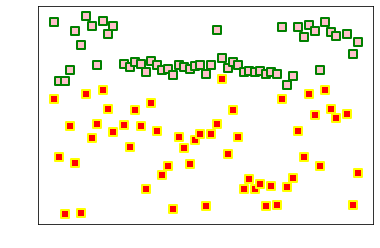

training dataset size= 3400
0
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\0.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2574942872289377


---- 0.12478355973644017 0.3598235400144578 -0.13271072749249752 -0.38268217275660454 
 1 -1 



----------
1
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\1.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.27221836200640176


---- 0.0 -0.0 0.27221836200640176 -0.7277816379935982 
 -1 1 



----------
2
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\2.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1966654229006239


---- 0.012370362552977656 -0.05053018381926627 0.18429506034764623 -0.7528043932801097 
 -1 1 



----------
3
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\3.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2931883145200662


---- 0.018441705173269464 -0.04445884119897447 0.27474660934679673 -0.6623528442809593 
 -1 1 



----------
4
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\4.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.31512182230895575


---- 0.1335184297525277 -0.2901857389217124 0.18160339255642804 -0.3946924387693318 
 -1 1 



----------
5
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\5.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.24481316622107555


---- 0.08825061332079695 -0.27223087010196684 0.1565625529002786 -0.48295596367695764 
 -1 1 



----------
6
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\6.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.24946137865421306


---- 0.12417950333769379 0.3736109923599318 -0.12528187531651927 -0.3769276289858552 
 1 -1 



----------
7
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\7.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3105596114622921


---- 0.1346664229359136 -0.2989586138221733 0.1758931885263785 -0.3904817747155345 
 -1 1 



----------
8
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\8.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2881416278217292


---- 0.02990351295673006 -0.07387709376362592 0.25823811486499915 -0.6379812784146449 
 -1 1 



----------
9
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\9.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.27886380810965


---- 0.14270760380421016 0.36903898952961234 -0.13615620430543984 -0.3520972023607377 
 1 -1 



----------
10
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\10.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2320693066370711


---- 0.10482980587609349 0.3468878615534683 -0.12723950076097762 -0.42104283180946056 
 1 -1 



----------
11
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\11.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3057068887631084


---- 0.13006342680133726 -0.2953879829708616 0.17564346196177116 -0.3989051282660299 
 -1 1 



----------
12
error  12
13
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\13.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.26808244900106115


---- 0.02938873842242234 -0.0802370074327493 0.23869371057863883 -0.6516805435661895 
 -1 1 



----------
14
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\14.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.287038193520415


---- 0.03146677605359659 -0.07815896980157505 0.2555714174668184 -0.6348028366780101 
 -1 1 



----------
15
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\15.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3499516103535821


---- 0.03836370629822984 -0.0712620395569418 0.31158790405535225 -0.5787863500894762 
 -1 1 



----------
16
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\16.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.26585997551595597


---- 0.029145098108974345 -0.0804806477461973 0.23671487740698163 -0.6536593767378468 
 -1 1 



----------
17
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\17.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21609041727709685


---- 0.02368907316615701 -0.08593667268901463 0.19240134411093984 -0.6979729100338885 
 -1 1 



----------
18
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\18.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3333490722194694


---- 0.03654364067218881 -0.07308210518298283 0.2968054315472806 -0.5935688225975478 
 -1 1 



----------
19
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\19.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.30275310022234375


---- 0.033189534421839965 -0.07643621143333167 0.2695635658005038 -0.6208106883443245 
 -1 1 



----------
20
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\20.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2945497172972169


---- 0.03229023245013735 -0.07733551340503428 0.26225948484707956 -0.6281147692977488 
 -1 1 



----------
21
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\21.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.27275658464736385


---- 0.02990114402887652 -0.07972460182629512 0.24285544061848735 -0.6475188135263411 
 -1 1 



----------
22
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\22.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.22533541120899778


---- 0.024702562521368186 -0.08492318333380346 0.2006328486876296 -0.6897414054571988 
 -1 1 



----------
23
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\23.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.26137208086245795


---- 0.028653109310265185 -0.08097263654490645 0.23271897155219276 -0.6576552825926356 
 -1 1 



----------
24
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\24.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.24414789866243844


---- 0.026764895489842677 -0.08286085036532896 0.21738300317259576 -0.6729912509722326 
 -1 1 



----------
25
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\25.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.32546212023465726


---- 0.03567902767832985 -0.07394671817684179 0.28978309255632745 -0.600591161588501 
 -1 1 



----------
26
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\26.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2709534029845174


---- 0.029703468894174613 -0.07992227696099703 0.24124993409034282 -0.6491243200544856 
 -1 1 



----------
27
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\27.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3061005193774366


---- 0.0335564977434069 -0.07606924811176473 0.2725440216340297 -0.6178302325107986 
 -1 1 



----------
28
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\28.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.251092685350686


---- 0.027526222910346884 -0.08209952294482475 0.22356646244033915 -0.6668077917044892 
 -1 1 



----------
29
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\29.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3010845439556


---- 0.033006617696596866 -0.07661912815857477 0.2680779262590032 -0.6222963278858252 
 -1 1 



----------
30
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\30.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3828081089248979


---- 0.14902798700972164 -0.2402740772236121 0.23378012191517628 -0.3769178138514899 
 -1 1 



----------
31
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\31.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3550598860099265


---- 0.03892370482709041 -0.07070204102808123 0.3161361811828361 -0.5742380729619923 
 -1 1 



----------
32
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\32.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.30753178225042627


---- 0.033713401003373215 -0.07591234485179843 0.27381838124705304 -0.6165558728977754 
 -1 1 



----------
33
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\33.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.30690181415677303


---- 0.03364434028124152 -0.07598140557393013 0.2732574738755315 -0.617116780269297 
 -1 1 



----------
34
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\34.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3198115383481048


---- 0.03505957842450081 -0.07456616743067082 0.28475195992360397 -0.6056222942212244 
 -1 1 



----------
35
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\35.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.258447712195125


---- 0.02833252321395332 -0.08129322264121833 0.23011518898117173 -0.6602590651636567 
 -1 1 



----------
36
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\36.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.32130781539915687


---- 0.03522360891222837 -0.07440213694294326 0.2860842064869285 -0.6042900476578998 
 -1 1 



----------
37
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\37.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.20554718102454997


---- 0.022533263028244273 -0.08709248282692737 0.1830139179963057 -0.7073603361485227 
 -1 1 



----------
38
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\38.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21650587003048696


---- 0.023734617484114987 -0.08589112837105665 0.19277125254637198 -0.6976030015984565 
 -1 1 



----------
39
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\39.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.20786195087570103


---- 0.02278702139965977 -0.08683872445551187 0.18507492947604126 -0.7052993246687871 
 -1 1 



----------
40
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\40.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2819235931040836


---- 0.03090608416820509 -0.07871966168696655 0.25101750893587854 -0.6393567452089499 
 -1 1 



----------
41
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\41.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.20859935811140035


---- 0.02286786021787231 -0.08675788563729933 0.18573149789352805 -0.7046427562513005 
 -1 1 



----------
42
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\42.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2800076967874941


---- 0.13569371784811635 0.34891338190278165 -0.14431397893937775 -0.3710789213097243 
 1 -1 



----------
43
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\43.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.22170664726770606


---- 0.0 -0.0 0.22170664726770606 -0.7782933527322939 
 -1 1 



----------
44
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\44.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1860551918745862


---- 0.011702973224304152 -0.05119757314793978 0.17435221865028203 -0.762747234977474 
 -1 1 



----------
45
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\45.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1820544004402425


---- 0.07713720839202015 0.34656696028221995 -0.10491719204822234 -0.4713786392775376 
 1 -1 



----------
46
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\46.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.22247075325098845


---- 0.08019658715009596 -0.28028489627266784 0.1422741661008925 -0.49724435047634374 
 -1 1 



----------
47
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\47.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1981881848717756


---- 0.09865619478873384 0.39913430090889174 -0.09953199008304177 -0.4026775142193327 
 1 -1 



----------
48
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\48.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.28625125364808707


---- 0.12412571038520022 0.30949932637288674 -0.16212554326288683 -0.40424941997902625 
 1 -1 



----------
49
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\49.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.20606731904012887


---- 0.02138579139522174 -0.08239481532513425 0.18468152764490714 -0.7115378656347369 
 -1 1 



----------
50
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\50.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.19611142233499326


---- 0.1003593522937833 0.41138724104003915 -0.09575207004120996 -0.3925013366249676 
 1 -1 



----------
51
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\51.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.28575432422684


---- 0.12908027679765888 0.32263739063190294 -0.15667404742918112 -0.3916082851412571 
 1 -1 



----------
52
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\52.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.19643756598480389


---- 0.08357463938045415 0.3418767703917447 -0.11286292660434974 -0.4616856636234514 
 1 -1 



----------
53
error  53
54
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\54.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.18422028482062552


---- 0.08053743897318245 0.3566426416656104 -0.10368284584744307 -0.45913707351376404 
 1 -1 



----------
55
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\55.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1794554904830843


---- 0.04981984880231774 -0.22779689431434844 0.12963564168076655 -0.5927476152025672 
 -1 1 



----------
56
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\56.docx
0.20499754891728253


---- 0.06948665283540324 -0.2694766821039888 0.1355108960818793 -0.5255257689787287 
 -1 1 



----------
[0.42782889662040785, 0.06805459050160044, 0.09634176550433893, 0.1204724884091995, 0.396558582082919, 0.3315644041223417, 0.43570821643677243, 0.40285868043413825, 0.14987086199569927, 0.4535258970277793, 0.39680557723143917, 0.39551527951992627, 0.149239921641644, 0.15397885777148246, 0.16970721197977423, 0.14868430327036772, 0.13624191371065295, 0.16555657744624608, 0.15790758444696468, 0.15585673871568295, 0.1504084555532197, 0.13855316219362818, 0.14756232960699323, 0.14325628405698834, 0.16358483945004304, 0.14995766013750808, 0.1587444392357379, 0.14499248072905024, 0.15749044538027873, 0.38767857540622475, 0.17098428089386036, 0.15910225495398528, 0.1

c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


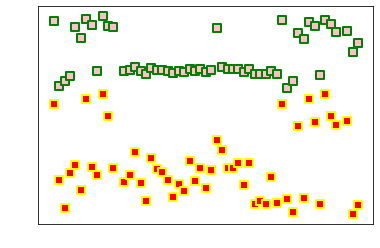

training dataset size= 4536
0
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\0.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.204201765047599


---- 0.09895762512373123 0.3856494746271667 -0.10524413992386775 -0.41014876032523423 
 1 -1 



----------
1
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\1.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2299887093100496


---- 0.0 -0.0 0.2299887093100496 -0.7700112906899503 
 -1 1 



----------
2
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\2.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.13899960319016955


---- 0.008743150986186766 -0.05415739538605716 0.13025645220398277 -0.8068430014237732 
 -1 1 



----------
3
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\3.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3261728351801086


---- 0.020516449544612698 -0.04238409682763124 0.3056563856354959 -0.6314430679922602 
 -1 1 



----------
4
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\4.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3043448960077001


---- 0.12895220115319062 -0.2947519675210495 0.17539269485450948 -0.4009031364712504 
 -1 1 



----------
5
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\5.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2568982268640736


---- 0.09260705390863895 -0.2678744295141248 0.16429117295543466 -0.4752273436218016 
 -1 1 



----------
6
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\6.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2643602513773958


---- 0.13159602057590278 0.3661944751217228 -0.13276423080149305 -0.36944527350088135 
 1 -1 



----------
7
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\7.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3276118107238059


---- 0.14206068346749376 -0.29156435329059316 0.18555112725631215 -0.3808238359856009 
 -1 1 



----------
8
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\8.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3218891453491504


---- 0.033405850801031686 -0.07037475591932431 0.2884832945481188 -0.6077360987315253 
 -1 1 



----------
9
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\9.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.24211919094348244


---- 0.12390367114606841 0.387842922187754 -0.11821551979741403 -0.37003788686876354 
 1 -1 



----------
10
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\10.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.17193534334945546


---- 0.07766623224651684 0.37405143518304496 -0.09426911110293862 -0.4540132214674996 
 1 -1 



----------
11
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\11.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.26543527834181474


---- 0.11292981337380109 0.31252159639839777 -0.15250546496801365 -0.42204312525978743 
 1 -1 



----------
12
error  12
13
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\13.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.34024277126802566


---- 0.03729936757208788 -0.07232637828308378 0.3029434036959378 -0.5874308504488907 
 -1 1 



----------
14
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\14.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.32798496107873276


---- 0.03595559598753552 -0.07367014986763612 0.29202936509119726 -0.5983448890536311 
 -1 1 



----------
15
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\15.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3922323349609522


---- 0.0429987622686099 -0.06662698358656173 0.34923357269234234 -0.5411406814524861 
 -1 1 



----------
16
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\16.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.29624001328796


---- 0.032475532408838576 -0.07715021344633306 0.26376448087912147 -0.626609773265707 
 -1 1 



----------
17
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\17.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.19399218966673124


---- 0.021266538482293332 -0.0883592073728783 0.17272565118443792 -0.7176486029603905 
 -1 1 



----------
18
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\18.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.35200383455167733


---- 0.038588682906608066 -0.07103706294856357 0.3134151516450693 -0.5769591024997591 
 -1 1 



----------
19
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\19.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.32637817231548716


---- 0.035779450570933014 -0.07384629528423862 0.29059872174455414 -0.5997755324002743 
 -1 1 



----------
20
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\20.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.23385954232607864


---- 0.025637026752845453 -0.08398871910232619 0.2082225155732332 -0.6821517385715952 
 -1 1 



----------
21
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\21.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2983311432982535


---- 0.03270477409589713 -0.07692097175927451 0.2656263692023564 -0.624747884942472 
 -1 1 



----------
22
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\22.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21540287605955608


---- 0.02361370094737793 -0.08601204490779371 0.19178917511217816 -0.6985850790326502 
 -1 1 



----------
23
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\23.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2773516876702724


---- 0.030404885625044224 -0.07922086023012742 0.2469468020452282 -0.6434274520996002 
 -1 1 



----------
24
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\24.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2339663491945236


---- 0.025648735535461188 -0.08397701031971044 0.20831761365906243 -0.682056640485766 
 -1 1 



----------
25
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\25.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3263965791306745


---- 0.03578146843177674 -0.0738442774233949 0.2906151106988978 -0.5997591434459307 
 -1 1 



----------
26
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\26.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3273680837067732


---- 0.035887970345533274 -0.07373777550963836 0.29148011336123997 -0.5988941407835885 
 -1 1 



----------
27
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\27.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.34449894452958585


---- 0.03776595374037525 -0.07185979211479639 0.3067329907892106 -0.5836412633556178 
 -1 1 



----------
28
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\28.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.16381155834925046


---- 0.01795796426373455 -0.0916677815914371 0.1458535940855159 -0.7445206600593125 
 -1 1 



----------
29
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\29.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2911095640474456


---- 0.03191310308427508 -0.07771264277089655 0.2591964609631705 -0.6311777931816579 
 -1 1 



----------
30
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\30.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3442253403105339


---- 0.13400763554431264 -0.2552944286890211 0.21021770476622126 -0.4004802310004449 
 -1 1 



----------
31
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\31.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3865463003671769


---- 0.042375426485308974 -0.06725031936986266 0.34417087388186796 -0.5462033802629604 
 -1 1 



----------
32
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\32.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3406402868307655


---- 0.037342945512142275 -0.07228280034302936 0.3032973413186233 -0.5870769128262051 
 -1 1 



----------
33
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\33.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3415857295082994


---- 0.037446590370830236 -0.07217915548434141 0.3041391391374692 -0.5862351150073593 
 -1 1 



----------
34
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\34.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.3725392313051557


---- 0.04083989109214 -0.06878585476303165 0.3316993402130157 -0.5586749139318128 
 -1 1 



----------
35
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\35.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21174239841855555


---- 0.023212418355797067 -0.08641332749937457 0.18852998006275848 -0.7018442740820698 
 -1 1 



----------
36
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\36.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.19763431581369656


---- 0.021665809277653027 -0.0879599365775186 0.17596850653604354 -0.7144057476087848 
 -1 1 



----------
37
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\37.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2120349551449772


---- 0.023244490105135986 -0.08638125575003565 0.1887904650398412 -0.7015837891049872 
 -1 1 



----------
38
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\38.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1970730861702866


---- 0.02160428405939818 -0.08802146179577346 0.17546880211088842 -0.71490545203394 
 -1 1 



----------
39
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\39.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.20922583054048227


---- 0.022936537725168116 -0.08668920813000353 0.18628929281531417 -0.7040849613295143 
 -1 1 



----------
40
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\40.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.24159263852579382


---- 0.026484773191509024 -0.08314097266366262 0.2151078653342848 -0.6752663888105436 
 -1 1 



----------
41
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\41.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.15976687280328258


---- 0.01751456259400819 -0.09211118326116345 0.1422523102092744 -0.748121943935554 
 -1 1 



----------
42
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\42.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.19803084021377715


---- 0.09596715113723203 0.3886399486136659 -0.1020636890765451 -0.4133292111725569 
 1 -1 



----------
43
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\43.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1738395574660783


---- 0.0 -0.0 0.1738395574660783 -0.8261604425339217 
 -1 1 



----------
44
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\44.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2311398106129999


---- 0.01453882037593468 -0.04836172599630925 0.21660099023706522 -0.7204984633906908 
 -1 1 



----------
45
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\45.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.22710266887243694


---- 0.09622434751829712 0.327479821155943 -0.13087832135413982 -0.4454175099716201 
 1 -1 



----------
46
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\46.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.24792355654062942


---- 0.08937185143721353 -0.2711096319855502 0.15855170510341587 -0.4809668114738203 
 -1 1 



----------
47
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\47.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21839664177668944


---- 0.108715772568715 0.3890747231289106 -0.10968086920797444 -0.3925286350944 
 1 -1 



----------
48
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\48.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21195633647916198


---- 0.09190957419688606 0.3417154625612009 -0.12004676228227593 -0.4463282009596371 
 1 -1 



----------
49
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\49.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.2572758828443474


---- 0.026700247216101595 -0.07708035950425439 0.2305756356282458 -0.6656437576513983 
 -1 1 



----------
50
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\50.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.18201479378554658


---- 0.09314545065611166 0.4186011426777108 -0.08886934312943492 -0.39938406353674266 
 1 -1 



----------
51
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\51.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.235014614926809


---- 0.10616025366659484 0.345557413762967 -0.12885436126021418 -0.4194279713102241 
 1 -1 



----------
52
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\52.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.15406835549483947


---- 0.06554859904656375 0.3599028107256351 -0.08851975644827571 -0.48602883377952544 
 1 -1 



----------
53
error  53
54
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\54.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.1790828714488163


---- 0.07829146418102009 0.3588886164577728 -0.1007914072677962 -0.4620285120934109 
 1 -1 



----------
55
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\55.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.20941800888274276


---- 0.05813794557600411 -0.21947879754066207 0.15128006330673865 -0.5711031935765952 
 -1 1 



----------
56
txt C:\Users\nikid\btp\docs\sde.docx
txt C:\Users\nikid\btp\docs\56.docx


c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\nikid\btp\btpenv\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.21783980470728723


---- 0.07383970668612795 -0.2651236282532641 0.1440000980211593 -0.5170365670394487 
 -1 1 



----------
[0.41450576607507317, 0.0574971773275124, 0.08192531057672534, 0.1287186185742101, 0.39386435050760504, 0.33458566928309125, 0.43943293461756816, 0.4071217302495167, 0.1583077413775546, 0.44433974273623744, 0.38177208640953525, 0.38544737691460285, 0.16728000220838513, 0.16421554966106192, 0.18027739313161678, 0.15627931271336873, 0.13071735680806154, 0.17022026802929807, 0.16381385247025051, 0.14068419497289839, 0.1568020952159421, 0.13607002840626775, 0.15155723130894683, 0.14071089669000963, 0.16381845417404733, 0.16406133031807202, 0.1683440455237752, 0.12317219897869133, 0.15499670040324012, 0.3780328832526338, 0.17885588448317297, 0.1673793810990701, 0.16761574176845356, 0.17535411721766764, 0.13515490899601762, 0.13162788834480288, 0.13522804817762302, 0.13148758093395038, 0.1345257670264993, 0.14261746902282718, 0.12216102759219938, 0.41296303486661773

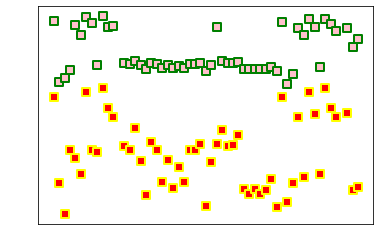

In [8]:
import csv
import numpy as np
import matplotlib.pyplot as plt



for samplepercent in np.arange(0.2,1,0.2):
    file=open('data.csv')
    csvreader=csv.reader(file)
    
    next(csvreader)
    i=0
    
    x=[]
    E_accept_test=[]
    result_jobfit_test=[]
    result_personalityconf_test=[]
    classifier_decision_test=[]
    max_personalityconf=0
    max_personality=[]
    results=[]
    model = rrm.main.train_model()
    model.train(samplepercent)
    for row in csvreader:
        
        # print(row)
        
        resume_select(row,samplepercent,model)
        
        # if(i==3):
        #     break
    file.close()
    print(classifier_decision_test,result_personalityconf_test,result_jobfit_test)
    results.append([classifier_decision_test,result_personalityconf_test,result_jobfit_test,E_accept_test])
    plt.scatter(x, classifier_decision_test, c ="pink",
                linewidths = 2,
                marker ="s",
                edgecolor ="green",
                s = 50)
    plt.scatter(x, E_accept_test, c ="red",
                linewidths = 2,
                marker ="s",
                edgecolor ="yellow",
                s = 50)
    # plt.scatter(x, result_personalityconf_test, c ="black",
    #             linewidths = 2,
    #             marker ="s",
    #             edgecolor ="pink",
    #             s = 50) 
    plt.tick_params(axis='x',colors='white')
    plt.tick_params(axis='y',colors='white')
    # plt.spines['bottom'].set_color('white')
    # plt.spines['left'].set_color('white')

    plt.savefig("plot"+str(i)+".png")
    plt.show()

    # fig=plt.figure()
    i=i+1
# print(max_personality,max_personalityconf)


NameError: name 'classifier_decision_test' is not defined